# Análisis Morfológico de Corpus de Canciones con NLTK

Este notebook realiza un análisis morfológico completo de un corpus de letras de canciones con etiquetado POS.

## 1. Importar librerías y cargar datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from src.utils import path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
#plt.style.use('seaborn-v0_8-darkgrid')
#sns.set_palette("husl")
#plt.rcParams['figure.figsize'] = (12, 6)
#plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [2]:
directorio_proyecto = path.obtener_ruta_local()
df = pd.read_csv(directorio_proyecto+'\\data\\results\\corpus_spotify_nltk.csv',delimiter = ',',decimal = ".", encoding='utf-8')
df.head()

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords,pos_tags_lower,pos_tags_lemma
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[['Look', 'at', 'her', 'face', ',', 'it', ""'s""...","[[('Look', 'NN'), ('at', 'IN'), ('her', 'PRP$'...","[[('Look', 'NN'), ('face', 'NN'), (',', ','), ...","[[('look', 'NN'), ('face', 'NN'), (',', ','), ...","[[('look', 'NN'), ('face', 'NN'), (',', ','), ..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[['Take', 'it', 'easy', 'with', 'me', ',', 'pl...","[[('Take', 'VB'), ('it', 'PRP'), ('easy', 'JJ'...","[[('Take', 'VB'), ('easy', 'JJ'), (',', ','), ...","[[('take', 'VB'), ('easy', 'JJ'), (',', ','), ...","[[('take', 'VB'), ('easy', 'JJ'), (',', ','), ..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[['I', ""'ll"", 'never', 'know', 'why', 'I', 'ha...","[[('I', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('I', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('i', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('i', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[['Making', 'somebody', 'happy', 'is', 'a', 'q...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('make', 'VBG'), ('somebody', 'NN'), ('happy..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[['Making', 'somebody', 'happy', 'is', 'a', 'q...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('make', 'VBG'), ('somebody', 'NN'), ('happy..."


## 2. Funciones auxiliares para procesamiento

In [3]:
def extraer_pos_tags(pos_string):
    """
    Extrae las etiquetas POS de una cadena de texto.
    Ejemplo: "[[(Look, NN), (at, IN)]]" -> ['NN', 'IN']
    """

    if pd.isna(pos_string):
        return []

    # Extraer las etiquetas POS (segundo elemento de cada tupla)
    # Busca patrones como ('palabra', 'TAG')
    tags = re.findall(r",\s*'([^']+)'\)", str(pos_string))
    return tags

def extraer_palabras(tokens_string):
    """
    Extrae palabras de una lista de tokens.
    """
    if pd.isna(tokens_string):
        return []

    # Extraer palabras
    palabras = re.findall(r"'([^']+)'", str(tokens_string))
    return palabras

def contar_palabras(texto):
    """Cuenta palabras en un texto."""
    if pd.isna(texto):
        return 0
    return len(str(texto).split())

def calcular_type_token_ratio(palabras):
    """Calcula la riqueza léxica (types/tokens)."""
    if not palabras or len(palabras) == 0:
        return 0
    types = len(set(palabras))
    tokens = len(palabras)
    return types / tokens if tokens > 0 else 0

print("✓ Funciones auxiliares definidas")

✓ Funciones auxiliares definidas


In [4]:
# Procesar las columnas de POS tags
print("Procesando etiquetas POS...")

df['pos_list'] = df['pos_tags_lemma'].apply(extraer_pos_tags)
df['tokens_list'] = df['tokens'].apply(extraer_palabras)
df['num_palabras'] = df['letra_cancion'].apply(contar_palabras)
df['num_tokens'] = df['tokens_list'].apply(len)
df['ttr'] = df['tokens_list'].apply(calcular_type_token_ratio)

print("✓ Procesamiento completado")
print(f"\nTotal de canciones: {len(df)}")
print(f"Total de artistas: {df['musico'].nunique()}")

Procesando etiquetas POS...
✓ Procesamiento completado

Total de canciones: 57650
Total de artistas: 643


In [5]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords,pos_tags_lower,pos_tags_lemma,pos_list,tokens_list,num_palabras,num_tokens,ttr
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[['Look', 'at', 'her', 'face', ',', 'it', ""'s""...","[[('Look', 'NN'), ('at', 'IN'), ('her', 'PRP$'...","[[('Look', 'NN'), ('face', 'NN'), (',', ','), ...","[[('look', 'NN'), ('face', 'NN'), (',', ','), ...","[[('look', 'NN'), ('face', 'NN'), (',', ','), ...","[NN, NN, ,, VBZ, JJ, NN, CC, VBZ, NN, JJ, VB, ...","[Look, at, her, face, ,, it, s"", , , , , , , ,...",153,169,0.301775
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[['Take', 'it', 'easy', 'with', 'me', ',', 'pl...","[[('Take', 'VB'), ('it', 'PRP'), ('easy', 'JJ'...","[[('Take', 'VB'), ('easy', 'JJ'), (',', ','), ...","[[('take', 'VB'), ('easy', 'JJ'), (',', ','), ...","[[('take', 'VB'), ('easy', 'JJ'), (',', ','), ...","[VB, JJ, ,, VB, NNP, RB, IN, NN, NN, NN, VB, N...","[Take, it, easy, with, me, ,, please, Touch, m...",260,301,0.255814
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[['I', ""'ll"", 'never', 'know', 'why', 'I', 'ha...","[[('I', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('I', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('i', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[[('i', 'PRP'), (""'ll"", 'MD'), ('never', 'RB')...","[PRP, MD, RB, VB, PRP, VB, WRB, PRP, VB, JJ, N...","[I, ll"", , , , , , , , , , , , , , , , , , , ,...",312,336,0.220238
3,ABBA,Bang,Making somebody happy is a question of give an...,"[['Making', 'somebody', 'happy', 'is', 'a', 'q...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('make', 'VBG'), ('somebody', 'NN'), ('happy...","[VBG, NN, JJ, NN, NN, VB, PRP, VB, VB, VB, ,, ...","[Making, somebody, happy, is, a, question, of,...",200,217,0.350230
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[['Making', 'somebody', 'happy', 'is', 'a', 'q...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('Making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('making', 'VBG'), ('somebody', 'NN'), ('hap...","[[('make', 'VBG'), ('somebody', 'NN'), ('happy...","[VBG, NN, JJ, NN, NN, VB, PRP, VB, VB, VB, ,, ...","[Making, somebody, happy, is, a, question, of,...",198,215,0.362791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,"[['Irie', 'days', 'come', 'on', 'play', 'Let',...","[[('Irie', 'NNP'), ('days', 'NNS'), ('come', '...","[[('Irie', 'NNP'), ('days', 'NNS'), ('come', '...","[[('irie', 'NNP'), ('days', 'NNS'), ('come', '...","[[('irie', 'NNP'), ('day', 'NNS'), ('come', 'V...","[NNP, NNS, VBP, NN, VB, NNS, VBP, VB, NNS, VBP...","[Irie, days, come, on, play, Let, the, angels,...",175,176,0.232955
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,"[['Power', 'to', 'the', 'workers', 'More', 'po...","[[('Power', 'NN'), ('to', 'TO'), ('the', 'DT')...","[[('Power', 'NN'), ('workers', 'NNS'), ('More'...","[[('power', 'NN'), ('workers', 'NNS'), ('more'...","[[('power', 'NN'), ('worker', 'NNS'), ('more',...","[NN, NNS, JJR, NN, NNP, NNS, PRP, VBP, NN, NNP...","[Power, to, the, workers, More, power, Power, ...",579,595,0.278992
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...,"[['all', 'you', 'need', 'is', 'something', 'i'...","[[('all', 'DT'), ('you', 'PRP'), ('need', 'VBP...","[[('need', 'VBP'), ('something', 'NN'), (""'ll""...","[[('need', 'VBP'), ('something', 'NN'), (""'ll""...","[[('need', 'VBP'), ('something', 'NN'), (""'ll""...","[VBP, NN, MD, VB, NNS, NN, NN, NN, NN, VBN, VB...","[all, you, need, is, something, i, ll"", , , , ...",272,306,0.235294
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,"[['northern', 'star', 'am', 'i', 'frightened',...","[[('north

## 3. Estadísticas Descriptivas Básicas

In [6]:
# Resumen estadístico por artista
stats_por_artista = df.groupby('musico').agg({
    'nombre_cancion': 'count',
    'num_palabras': ['mean', 'median', 'std'],
    'num_tokens': ['mean', 'median'],
    'ttr': ['mean', 'median']
}).round(2)

stats_por_artista.columns = ['_'.join(col).strip() for col in stats_por_artista.columns.values]
stats_por_artista = stats_por_artista.rename(columns={'nombre_cancion_count': 'num_canciones'})

print("Estadísticas por artista:")
stats_por_artista

Estadísticas por artista:


,num_canciones,num_palabras_mean,num_palabras_median,num_palabras_std,num_tokens_mean,num_tokens_median,ttr_mean,ttr_median
musico,,,,,,,,
'n Sync,93,269.57,269.0,98.87,304.12,298.0,0.28,0.25
ABBA,113,250.43,247.0,89.78,275.21,270.0,0.29,0.28
Ace Of Base,74,240.96,242.5,77.46,262.51,258.5,0.28,0.25
Adam Sandler,70,261.11,253.5,118.05,317.93,291.5,0.29,0.29
Adele,54,292.22,285.5,93.36,325.63,310.5,0.26,0.23
...,...,...,...,...,...,...,...,...
Zoegirl,38,257.50,223.5,96.07,284.55,253.0,0.31,0.30
Zornik,12,160.33,148.0,39.28,172.83,165.5,0.31,0.33
Zox,21,261.95,240.0,70.99,291.38,255.0,0.27,0.28


In [7]:
# Resumen por artista
resumen = df.groupby('musico').agg({
    'nombre_cancion': 'count',
    'num_palabras': ['mean', 'sum'],
}).round(1)

resumen.columns = ['Num_Canciones', 'Promedio_Palabras', 'Total_Palabras']

print("\nResumen por artista:")
print(resumen)
print("\n" + "="*60)


Resumen por artista:
              Num_Canciones  Promedio_Palabras  Total_Palabras
musico                                                        
'n Sync                  93              269.6           25070
ABBA                    113              250.4           28299
Ace Of Base              74              241.0           17831
Adam Sandler             70              261.1           18278
Adele                    54              292.2           15780
...                     ...                ...             ...
Zoegirl                  38              257.5            9785
Zornik                   12              160.3            1924
Zox                      21              262.0            5501
Zucchero                 30              204.4            6133
Zwan                     14              210.5            2947

[643 rows x 3 columns]



In [8]:
# Consolidar todos los POS tags en una lista
all_pos_tags = [tag for tags_list in df['pos_list'] for tag in tags_list]

print(f"Total de tokens etiquetados: {len(all_pos_tags):,}")
print(f"Número de etiquetas únicas: {len(set(all_pos_tags))}")

Total de tokens etiquetados: 9,615,026
Número de etiquetas únicas: 43


In [9]:
# Contar frecuencias de POS tags
pos_counts = Counter(all_pos_tags)
pos_df = pd.DataFrame(pos_counts.most_common(), columns=['POS_Tag', 'Frecuencia'])

# Calcular porcentajes
pos_df['Porcentaje'] = (pos_df['Frecuencia'] / pos_df['Frecuencia'].sum() * 100).round(2)

print("🏆 Top 15 POS Tags más frecuentes:")
print(pos_df.head(15))

🏆 Top 15 POS Tags más frecuentes:
   POS_Tag  Frecuencia  Porcentaje
0       NN     1780718       18.52
1      PRP      860058        8.94
2      NNP      849310        8.83
3       VB      762097        7.93
4      VBP      710958        7.39
5       JJ      629582        6.55
6       RB      577449        6.01
7        ,      567814        5.91
8      NNS      355383        3.70
9       IN      290481        3.02
10     VBZ      273506        2.84
11     VBD      248004        2.58
12     VBG      230508        2.40
13      MD      195874        2.04
14       .      191233        1.99


### 📖 Diccionario de POS Tags (Penn Treebank)

| Tag | Categoría | Descripción |
|-----|-----------|-------------|
| NN  | Sustantivo | Sustantivo singular |
| VB  | Verbo | Verbo en forma base |
| IN  | Preposición | Preposición o conjunción subordinante |
| PRP | Pronombre | Pronombre personal |
| JJ  | Adjetivo | Adjetivo |
| RB  | Adverbio | Adverbio |
| VBG | Verbo | Verbo en gerundio |
| NNP | Sustantivo | Sustantivo propio singular |
| MD  | Modal | Verbo modal |
| VBD | Verbo | Verbo en pasado |

In [10]:
# Obtener lista de artistas únicos
artistas = df['musico'].unique()
print(f"🎤 Artistas a analizar: {list(artistas)}")

# Crear diccionario para almacenar resultados por artista
resultados_por_artista = {}

for artista in artistas:
    # Filtrar datos del artista
    df_artista = df[df['musico'] == artista]

    # Extraer POS tags del artista
    pos_tags_artista = [tag for tags_list in df_artista['pos_list'] for tag in tags_list]

    # Contar frecuencias
    pos_counts = Counter(pos_tags_artista)
    pos_df = pd.DataFrame(pos_counts.most_common(), columns=['POS_Tag', 'Frecuencia'])
    pos_df['Porcentaje'] = (pos_df['Frecuencia'] / pos_df['Frecuencia'].sum() * 100).round(2)

    # Guardar en diccionario
    resultados_por_artista[artista] = {
        'pos_df': pos_df,
        'total_tokens': len(pos_tags_artista),
        'num_canciones': len(df_artista)
    }

    print(f"\n{'='*60}")
    print(f"🎤 Artista: {artista}")
    print(f"📊 Total tokens: {len(pos_tags_artista):,}")
    print(f"🎵 Número de canciones: {len(df_artista)}")
    print(f"\nTop 10 POS Tags:")
    print(pos_df.head(10))

🎤 Artistas a analizar: ['ABBA', 'Ace Of Base', 'Adam Sandler', 'Adele', 'Aerosmith', 'Air Supply', 'Aiza Seguerra', 'Alabama', 'Alan Parsons Project', 'Aled Jones', 'Alice Cooper', 'Alice In Chains', 'Alison Krauss', 'Allman Brothers Band', 'Alphaville', 'America', 'Amy Grant', 'Andrea Bocelli', 'Andy Williams', 'Annie', 'Ariana Grande', 'Ariel Rivera', 'Arlo Guthrie', 'Arrogant Worms', 'Avril Lavigne', 'Backstreet Boys', 'Barbie', 'Barbra Streisand', 'Beach Boys', 'The Beatles', 'Beautiful South', 'Beauty And The Beast', 'Bee Gees', 'Bette Midler', 'Bill Withers', 'Billie Holiday', 'Billy Joel', 'Bing Crosby', 'Black Sabbath', 'Blur', 'Bob Dylan', 'Bob Marley', 'Bob Rivers', 'Bob Seger', 'Bon Jovi', 'Boney M.', 'Bonnie Raitt', 'Bosson', 'Bread', 'Britney Spears', 'Bruce Springsteen', 'Bruno Mars', 'Bryan White', 'Cake', 'Carly Simon', 'Carol Banawa', 'Carpenters', 'Cat Stevens', 'Celine Dion', 'Chaka Khan', 'Cheap Trick', 'Cher', 'Chicago', 'Children', 'Chris Brown', 'Chris Rea', 'Chr

📊 Mostrando Top 15 artistas (de 643 totales)
Top 15: ['Insane Clown Posse', 'Lil Wayne', 'LL Cool J', 'Chris Brown', 'R. Kelly', 'Fabolous', 'Drake', 'Rihanna', 'Ne-Yo', 'Michael Jackson', 'Bob Dylan', 'Kanye West', 'Usher', 'Mariah Carey', 'Glee']



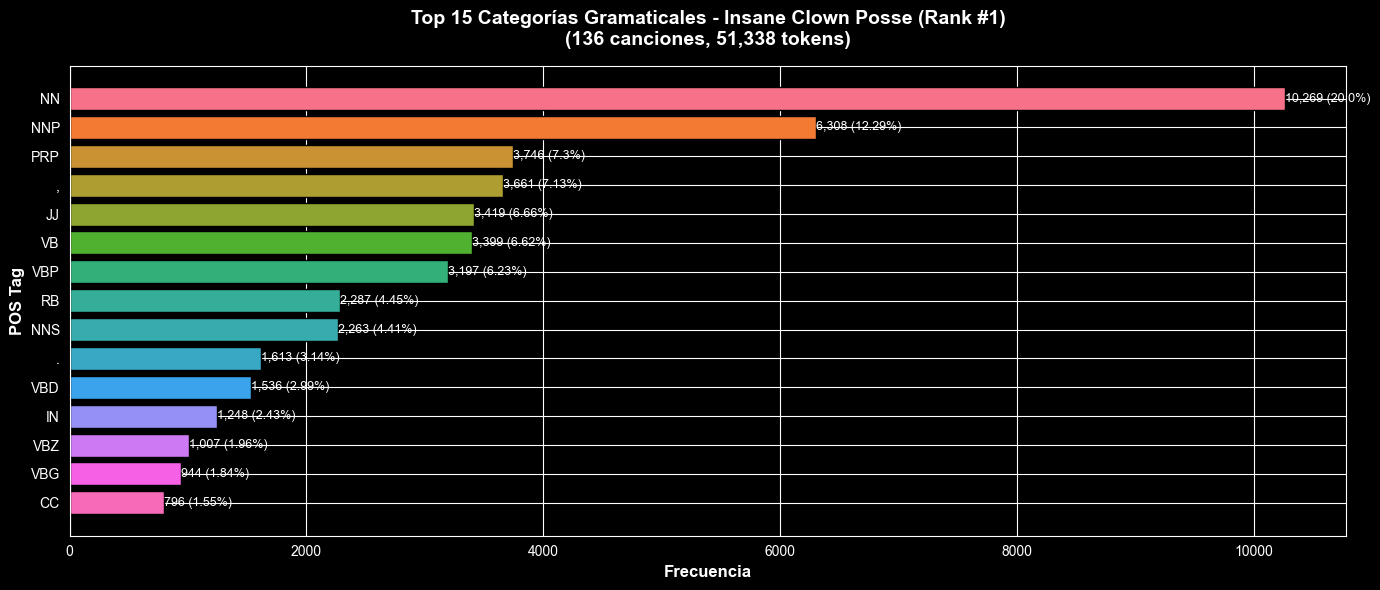

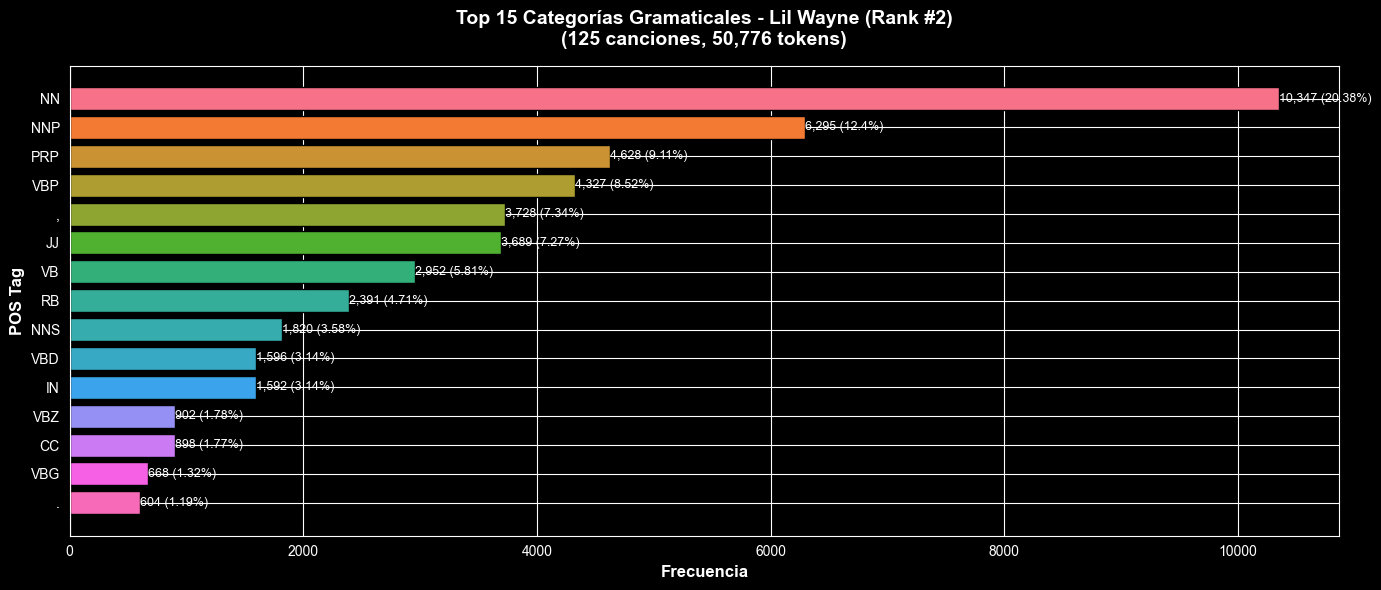

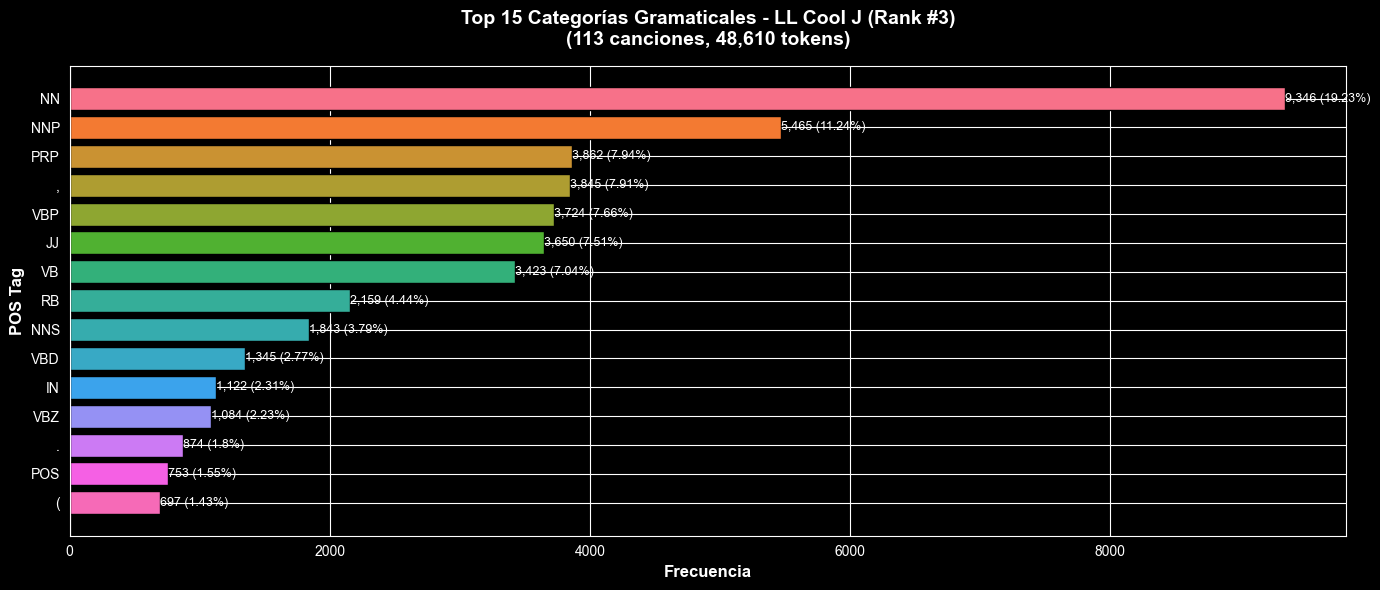

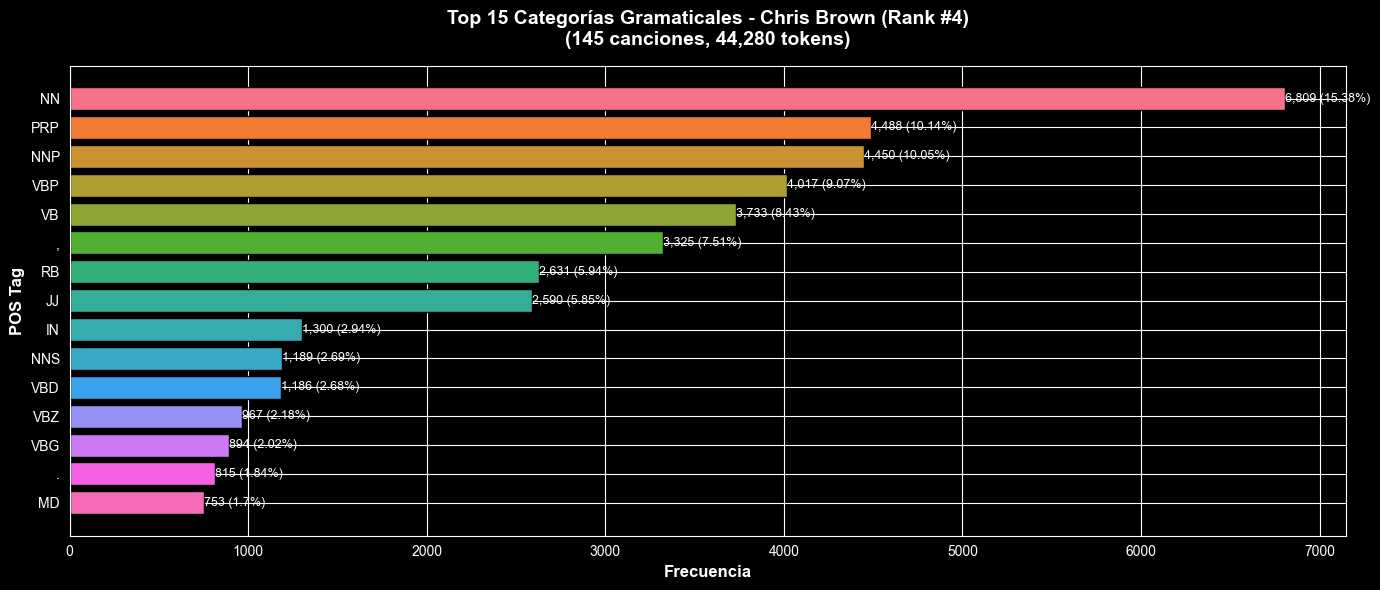

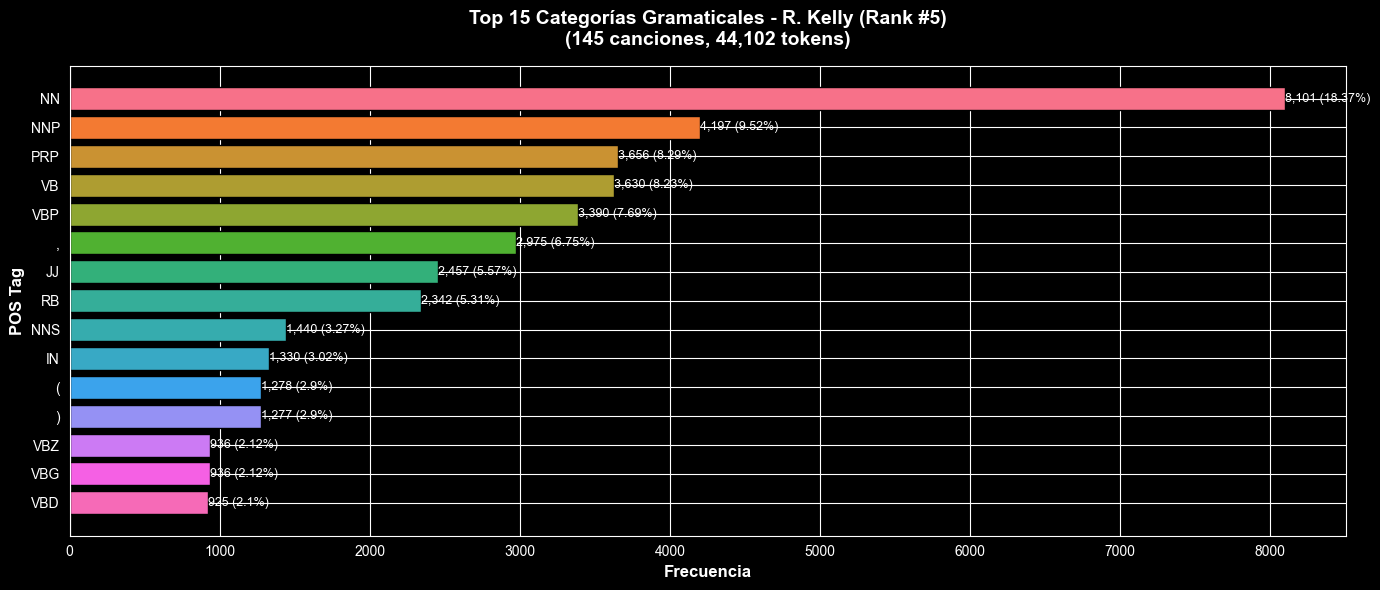

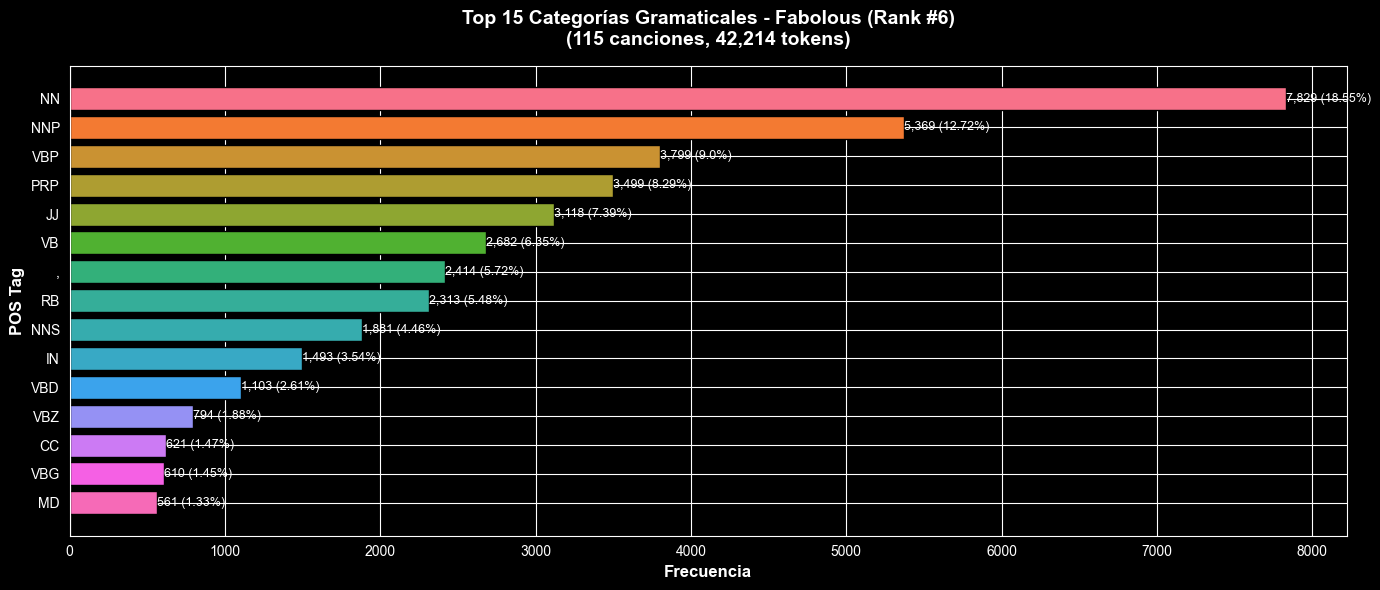

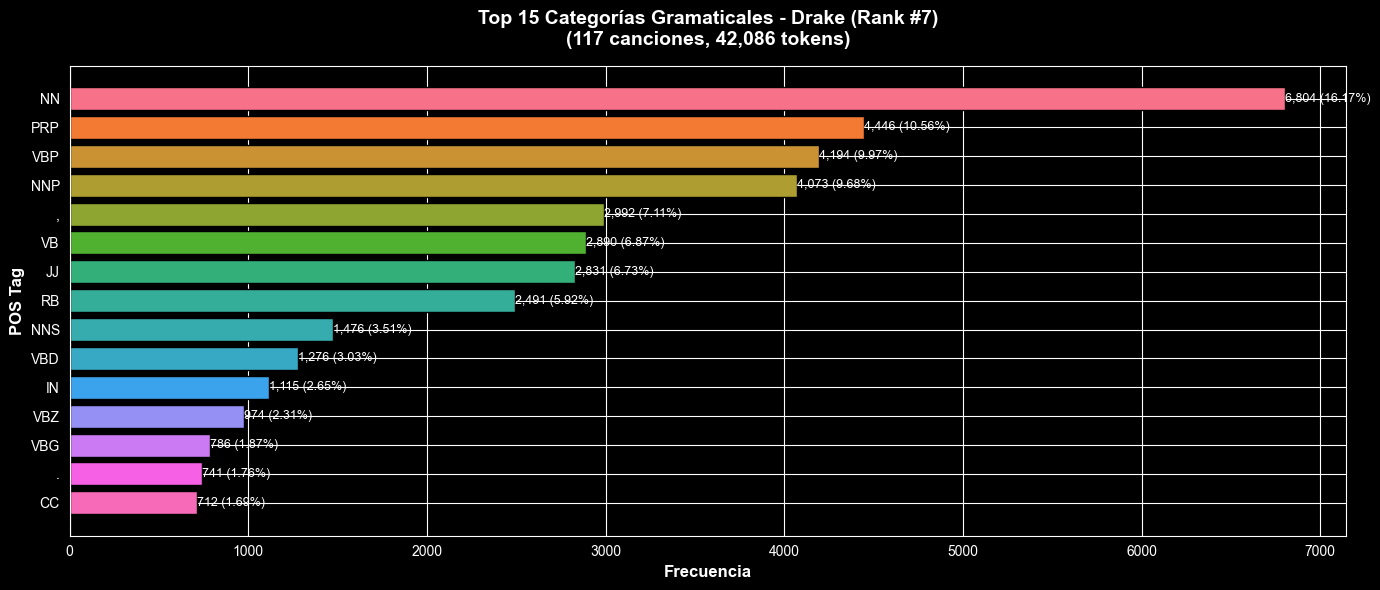

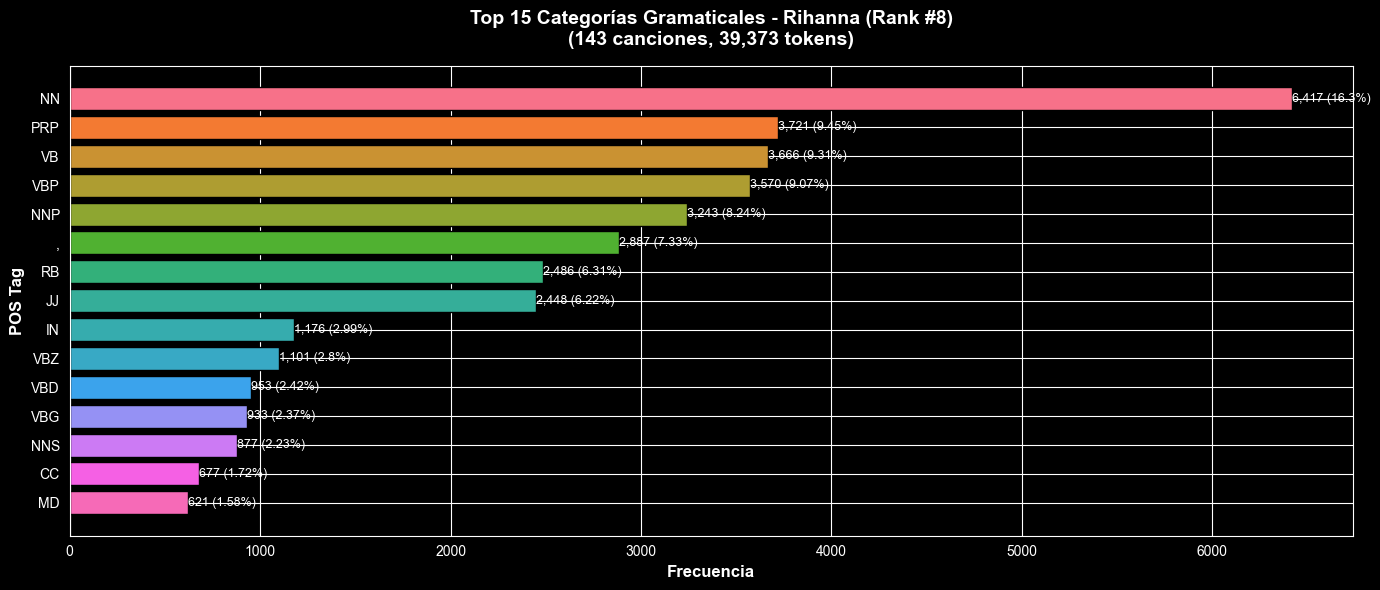

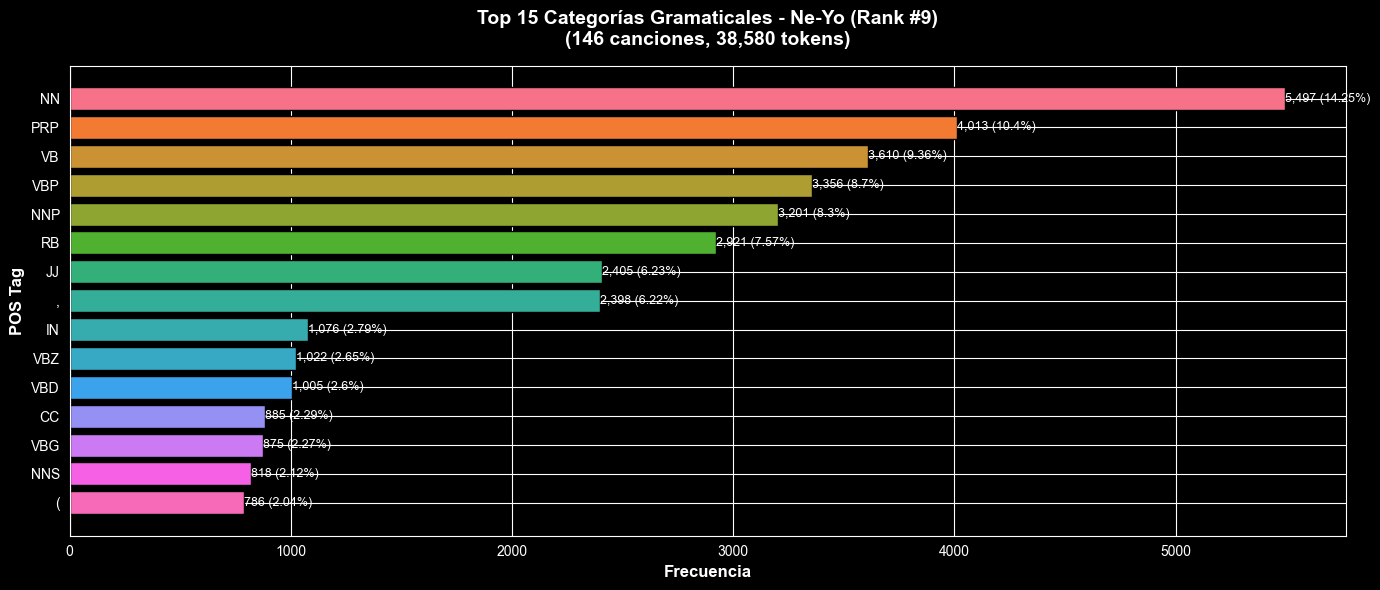

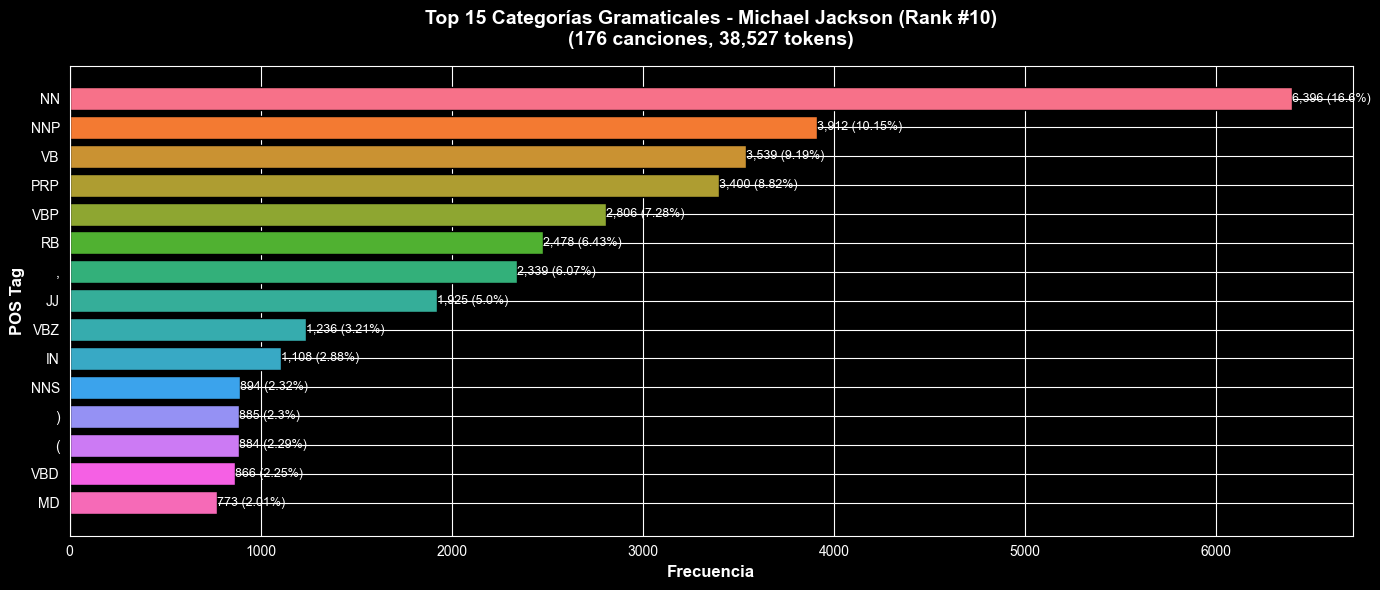

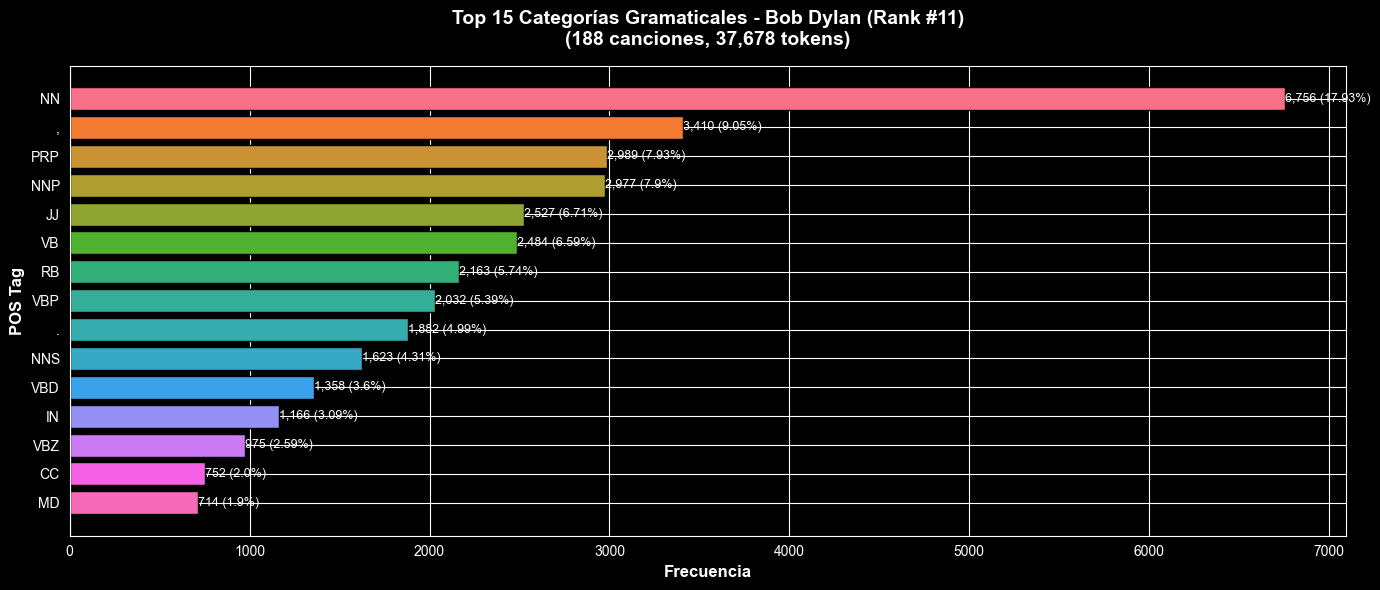

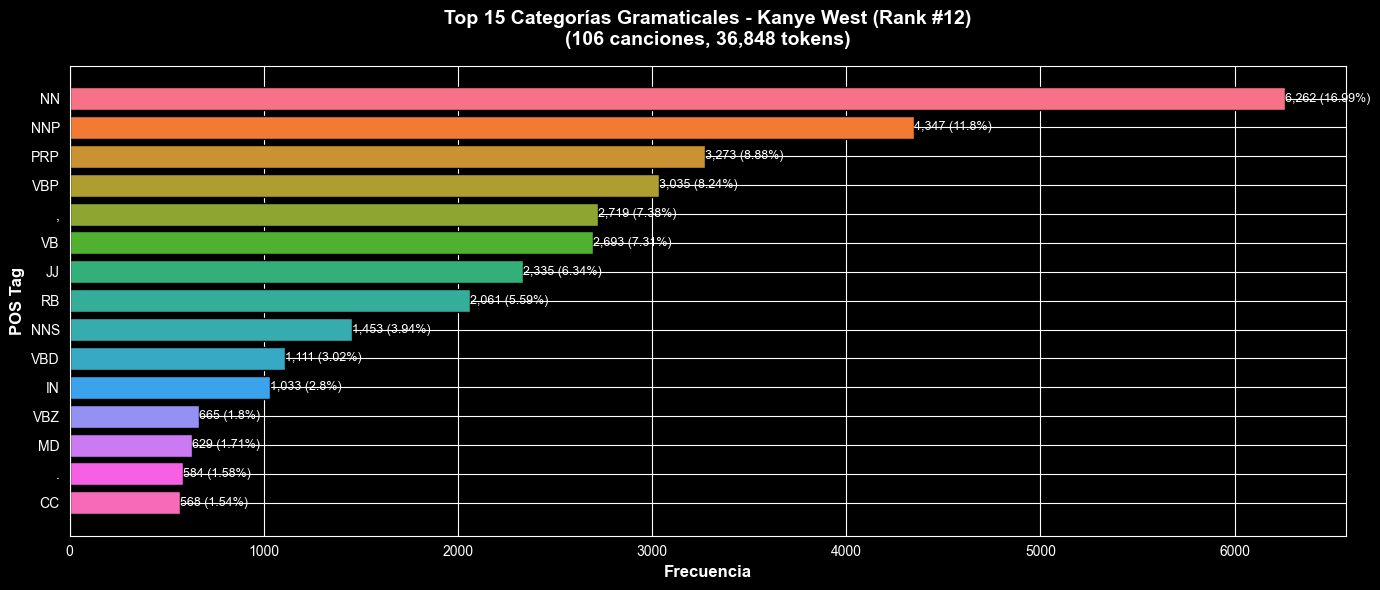

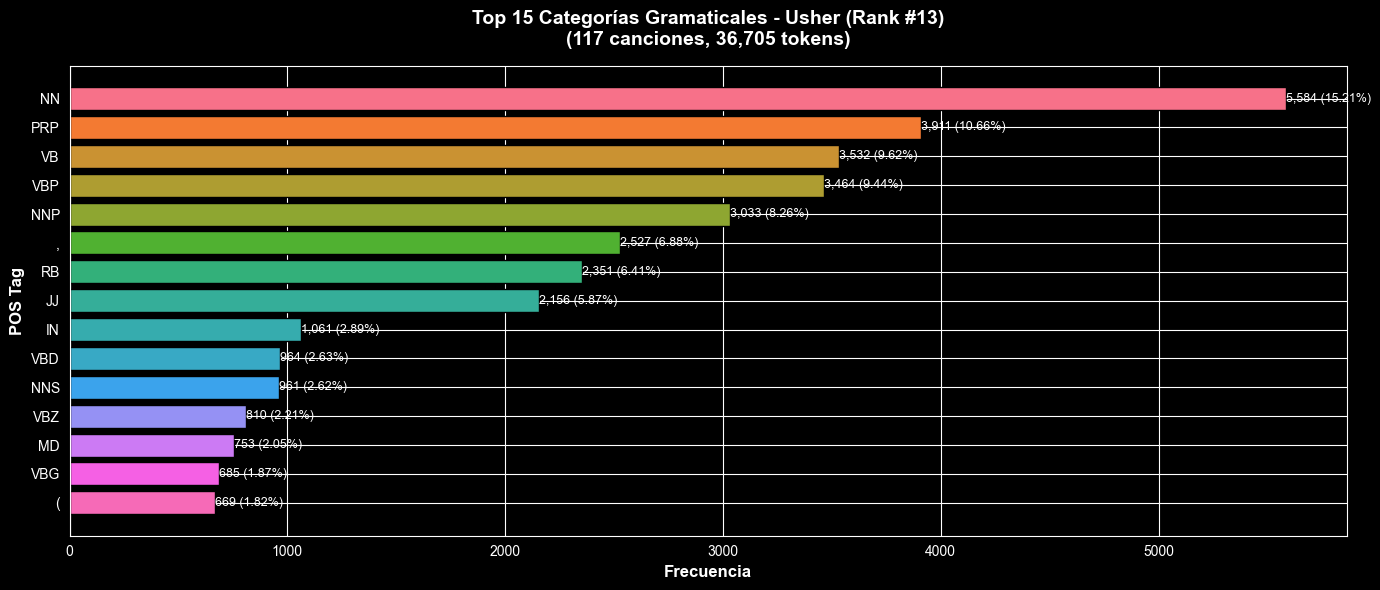

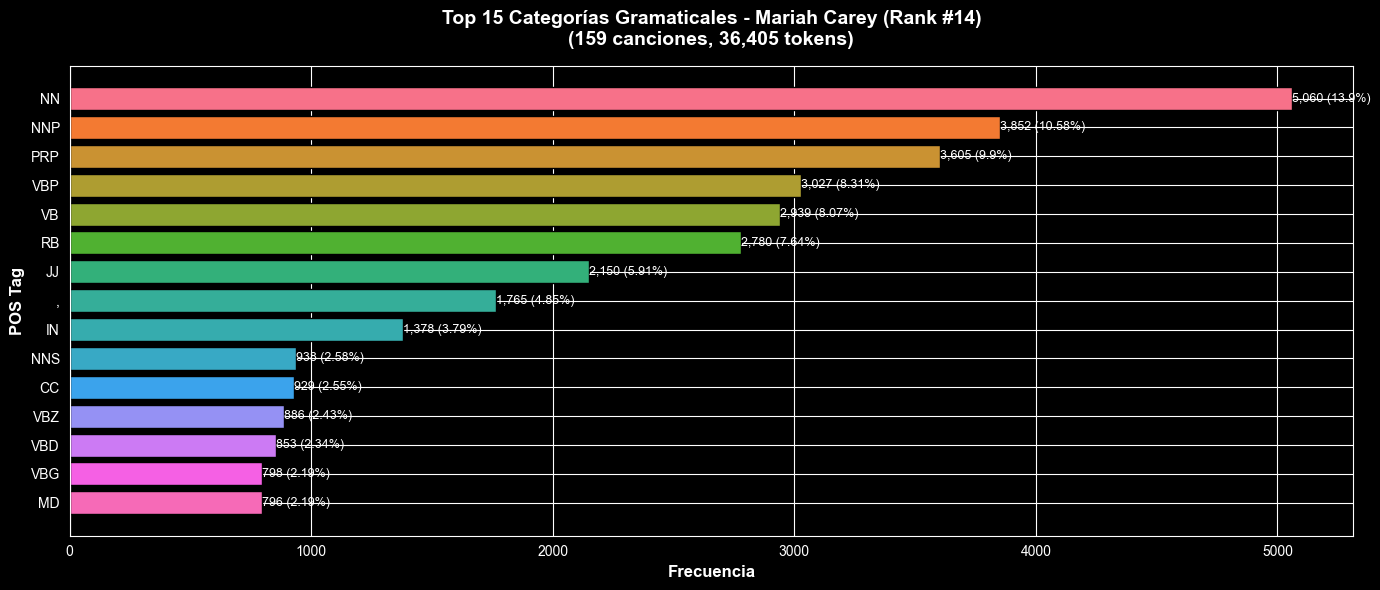

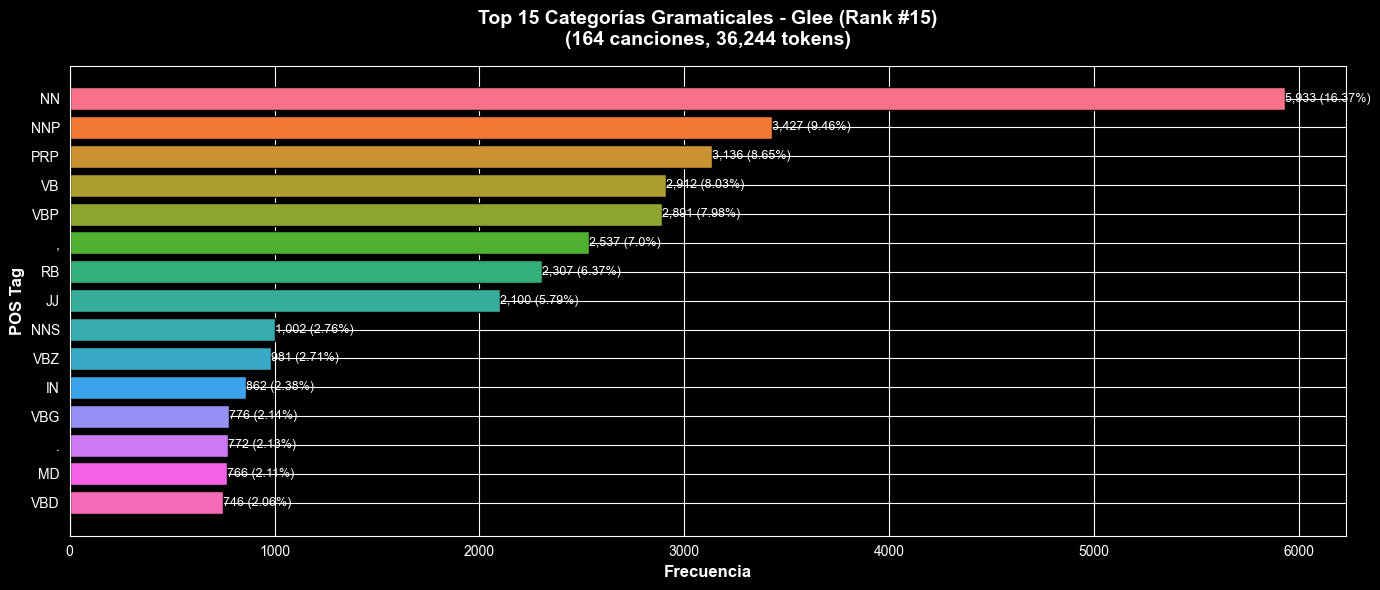

In [11]:
# Primero, calcular el ranking de artistas por número total de tokens
ranking_artistas = []
for artista in artistas:
    total_tokens = resultados_por_artista[artista]['total_tokens']
    ranking_artistas.append((artista, total_tokens))

# Ordenar por total de tokens (descendente) y tomar top 15
ranking_artistas.sort(key=lambda x: x[1], reverse=True)
top_15_artistas = [artista for artista, _ in ranking_artistas[:15]]

print(f"📊 Mostrando Top 15 artistas (de {len(artistas)} totales)")
print(f"Top 15: {top_15_artistas}\n")

# Visualización COMPARATIVA: Top 15 POS Tags solo para Top 15 artistas
for idx, artista in enumerate(top_15_artistas):
    # Crear figura individual para cada artista
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))

    pos_df = resultados_por_artista[artista]['pos_df']
    top_15 = pos_df.head(15)

    bars = ax.barh(top_15['POS_Tag'], top_15['Frecuencia'],
                   color=sns.color_palette('husl', 15), edgecolor='black')

    # Añadir valores en las barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width):,} ({top_15.iloc[i]["Porcentaje"]}%)',
                ha='left', va='center', fontsize=9)

    ax.set_xlabel('Frecuencia', fontsize=12, fontweight='bold')
    ax.set_ylabel('POS Tag', fontsize=12, fontweight='bold')
    ax.set_title(f'Top 15 Categorías Gramaticales - {artista} (Rank #{idx+1})\n'
                 f'({resultados_por_artista[artista]["num_canciones"]} canciones, '
                 f'{resultados_por_artista[artista]["total_tokens"]:,} tokens)',
                 fontsize=14, fontweight='bold', pad=15)
    ax.invert_yaxis()

    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Liberar memoria